# PRA 105, L061502 (2022)

100%|██████████| 101/101 [00:10<00:00,  9.52it/s]


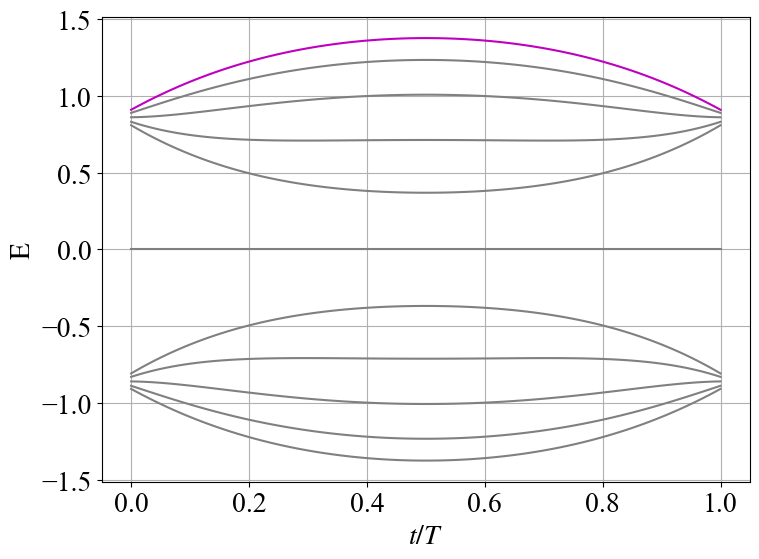

In [1]:
import guan
import numpy as np
import matplotlib.pyplot as plt
from numpy import  pi, sqrt,cos
import matplotlib as mpl
import tqdm

rc = {"font.family" : "serif", 
      "mathtext.fontset" : "stix"}
plt.rcParams.update(rc)
plt.rcParams["font.serif"] = ["Times New Roman"] + plt.rcParams["font.serif"]
mpl.rcParams['font.size'] = 20
L =1
J =1
def pulse2(t):
    return J*(0.1+0.8*(1-np.exp(-3*t/L)/(1-np.exp(-3))))

def pulse1(t):
    return J*(0.1+0.8*(1-np.exp(-3*(L-t)/L)/(1-np.exp(-3))))

def H_ssh(N,t):

    hamiltonian = np.zeros((N, N))

    for i in range(N-1):

        if i % 2 == 0:

            hamiltonian[i,i+1] =pulse1(t);
            hamiltonian[i+1,i] = pulse1(t);
        elif i % 2 == 1:
            hamiltonian[i,i+1] = pulse2(t);
            hamiltonian[i+1,i] = pulse2(t);



        guan.statistics_of_guan_package()


    return hamiltonian

N = 11
start = 0
end =1
step = 0.01  # 设置步长，根据需要"调整
values = np.arange(start, end + step, step)

eigenvalues = []

for step in tqdm.tqdm(values):

    t = step
    hamiltonian = H_ssh(N,t)
    eigvals  = guan.calculate_eigenvalue(hamiltonian)
    eigenvalues.append(eigvals) 

eigenvalues = np.array(eigenvalues).T
# %%
plt.figure(figsize=(8, 6)) 
for i in range(len(eigenvalues)):
    if i == 10:
        plt.plot(values, eigenvalues[i],'m',label='No.20')
    else:
        plt.plot(values, eigenvalues[i],'#808080')

plt.xlabel(r'$t/T$')
plt.ylabel('$\mathrm{E}$')
plt.grid(True)
plt.tight_layout() 
plt.show()

100%|██████████| 101/101 [00:10<00:00, 10.02it/s]


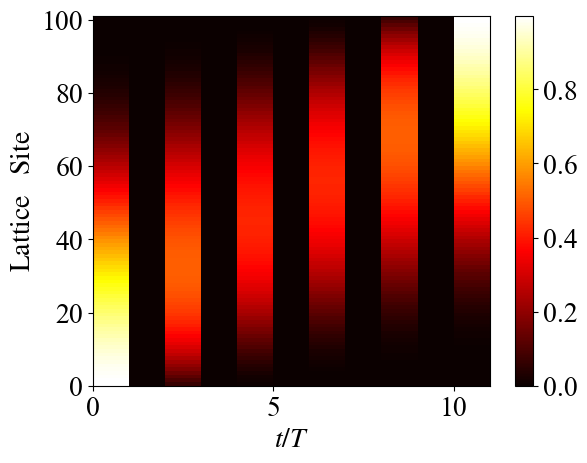

In [2]:
P1=[]
S1=[]
start = 0
end =1
step = 0.01  # 设置步长，根据需要调整
values = np.arange(start, end + step, step)

for step in tqdm.tqdm(values):
    t = step
    hamiltonian = H_ssh(N,t)
    eigenvectors =[]
    eigenvectors = guan.calculate_eigenvector(hamiltonian) 
    eigenvectors =eigenvectors.T
    eigenvectors =eigenvectors[5]
    P1.append(abs(eigenvectors))


P1 = np.array(P1)
P1 = np.fliplr(P1)
plt.pcolormesh(P1,cmap='hot')
plt.xlabel(r'$t/T$')
plt.ylabel(r'$\mathrm{Lattice\quadSite}$')
plt.colorbar()
plt.show()

# Fidelity

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from qutip import *

def H_ssh1(N):

    hamiltonian = np.zeros((N, N))

    for i in range(N-1):

        if i % 2 == 0:

            hamiltonian[i,i+1] =1;
            hamiltonian[i+1,i] =1;
                   
    return hamiltonian
            

def H_ssh2(N):

    hamiltonian = np.zeros((N, N))

    for i in range(N-1):

        if i % 2 == 1:
            hamiltonian[i,i+1] =1;
            hamiltonian[i+1,i] =1;
    
      
    
    return hamiltonian


def H2_exp(t):
    args = {'t':t}
    return J*(0.1+0.8*(1-np.exp(-3*(L-t)/L)/(1-np.exp(-3))))

def H1_exp(t):
    args = {'t':t}
    return J*(0.1+0.8*(1-np.exp(-3*t/L)/(1-np.exp(-3))))

def H2_cos(t):
    args = {'t':t}
    return J*(0.1+0.4*(1+np.cos(np.pi*t/L)))

def H1_cos(t):
    args = {'t':t}
    return J*(0.1+0.4*(1-np.cos(np.pi*t/L)))

N= 11
H_1 = Qobj(H_ssh1(N))
H_2 = Qobj(H_ssh2(N))
H_exp = [[H_1, H1_exp], [H_2, H2_exp]]
H_cos = [[H_1, H1_cos], [H_2, H2_cos]]




In [4]:

# 初始态为基态
psi0 = basis(N, 0)
psif =basis(N,N-1)

J =1

fid_exp=[]
fid_cos=[]
# 时间列表
for i in range(500):

    error  = 0.00000001
    
    L = i/10+error

    tlist = np.linspace(0,L,1000)
    # 演化
    options = {'nsteps': 10000}
    
    result_exp = mesolve(H_exp, psi0, tlist,options=options)
    result_cos = mesolve(H_cos, psi0, tlist,options=options)
    fid_exp.append(fidelity(psif,result_exp.states[-1]))
    fid_cos.append(fidelity(psif,result_cos.states[-1]))


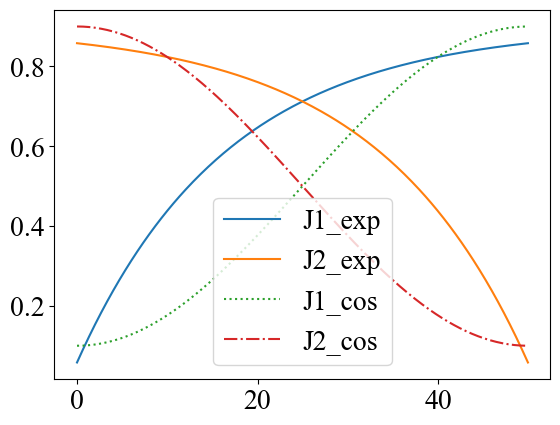

In [5]:
x = np.linspace(0,L,300)

plt.plot(x,H1_exp(x),label='J1_exp')   
plt.plot(x,H2_exp(x),label='J2_exp')
plt.plot(x,H1_cos(x),linestyle=':',label='J1_cos')   
plt.plot(x,H2_cos(x),linestyle='-.',label='J2_cos')
plt.legend()
plt.show()

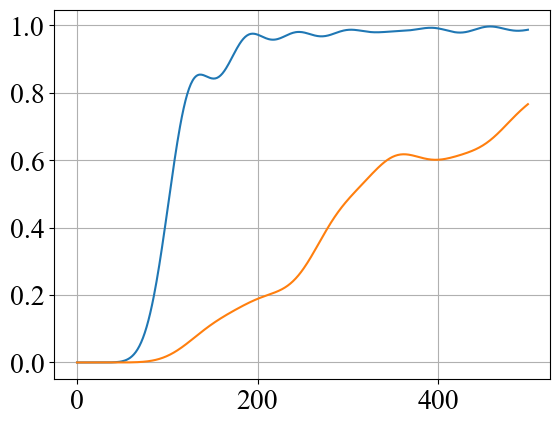

In [6]:
plt.grid(True)
plt.plot(fid_exp)
plt.plot(fid_cos)